In [1]:
!pip install -qq google-play-scraper

In [1]:
import os

import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [2]:
app_packages = ['com.ss.android.ugc.trill',
                'omegle.tv']

In [3]:
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='id', country='id')
    del info['comments']
    app_infos.append(info)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:24<00:00, 12.17s/it]


In [4]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str
    )
    
    print(highlight(json_str,JsonLexer(),TerminalFormatter()))

In [5]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "4.4",
  "androidVersionText": "4.4 dan yang lebih tinggi",
  "appId": "com.ss.android.ugc.trill",
  "containsAds": false,
  "contentRating": "Rating 12+",
  "contentRatingDescription": "Disarankan dengan Bimbingan Orang Tua",
  "currency": "USD",
  "description": "Cuma TikTok pusatnya video kreatif dan viral! Download sekarang!\r\n\r\nTikTok adalah platform sosial video pendek yang dipadukan dengan musik. Musik untuk tarian, gaya kreatif, ataupun unjuk bakat, para pengguna didorong untuk berimajinasi sebebas-bebasnya dan meluapkan ekspresi mereka dengan bebas. Dirancang untuk generasi kekinian, melalui TikTok kamu dapat membuat video pendek yang unik dengan cepat dan mudah untuk dibagikan dengan teman dan ke seluruh dunia. TikTok adalah gudangnya video viral yang cocok untuk kamu yang berjiwa muda. Kami berusaha untuk memberdayakan lebih banyak pembuat konten kreatif dan berkualitas untuk menjadi bagian dari revolusi konten.\r\n\r\n[Kualita

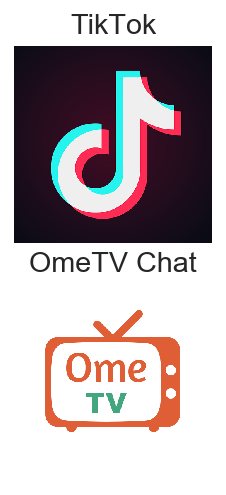

In [6]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(12, 4))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

In [8]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,TikTok,Cuma TikTok pusatnya video kreatif dan viral! ...,Cuma TikTok pusatnya video kreatif dan viral! ...,Gudangnya Video Lucu Indonesia,Gudangnya Video Lucu Indonesia,100.000.000+,100000000,4.156960,10186466,4213962,...,None,False,7 Mei 2017,1622224208,19.5.43,Dapatkan berbagai efek terbaru dan terbaik.,Dapatkan berbagai efek terbaru dan terbaik.,False,com.ss.android.ugc.trill,https://play.google.com/store/apps/details?id=...
1,"OmeTV Chat Video - Temui orang baru, dan berteman",Mulai bertemu wajah baru dan berteman di OmeTV...,Mulai bertemu wajah baru dan berteman di OmeTV...,Luncurkan chat video dan buka kesenangan tanpa...,Luncurkan chat video dan buka kesenangan tanpa...,50.000.000+,50000000,4.017658,422669,178297,...,None,False,31 Jul 2015,1621327262,605032,Video chat OmeTV has a brand new look!\r\n\r\n...,Video chat OmeTV has a brand new look!<br><br>...,False,omegle.tv,https://play.google.com/store/apps/details?id=...


### Save Data

In [11]:
os.makedirs("data/list_apps/", exist_ok=True)

In [12]:
app_infos_df.to_csv('data/list_apps/info_apps.csv', index = None, header=True)

# Get App Reviews

In [13]:
app_reviews = []

for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.RATING, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='id',
                country='id',
                sort=sort_order,
                count= 300 if score == 3 else 200,
                filter_score_with=score
              )
            
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'rating' if sort_order == Sort.RATING else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:34<00:00, 17.31s/it]


In [14]:
print_json(app_reviews[1])

{
  "appId": "com.ss.android.ugc.trill",
  "at": "2021-05-28 13:20:53",
  "content": "Aplikasinya sebenarnya bagus..Tp knp skrg sy masuk akun sy hilang, tertulis frekuensi masuk terlalu sering. Apa maksudnya?? Sampai2 sy hapus aplikasi ini trus sy restart hp sy, download kembali tetap seperti itu. Tolong penjelasannya. Sementara sy kasih bintang 1 sebelum semuanya kembali seperti semula.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "19.5.43",
  "reviewId": "gp:AOqpTOEaxCuEU61SHHaTHDs-GydVhgd4rWOIwMDUgatmJAvDFNtYVLljaCMfs3ktQBzYU7roFf_t3-dgPlen1bE",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 24,
  "userImage": "https://play-lh.googleusercontent.com/a/AATXAJwMgNzuc9QVAMP8yRdeu2bLKwtO3Z5zrDw_EL27=mo",
  "userName": "Dapur Mama Hoshi"
}



In [13]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

(4400, 12)

In [15]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEaxCuEU61SHHaTHDs-GydVhgd4rWOIwMDUgat...,Dapur Mama Hoshi,https://play-lh.googleusercontent.com/a/AATXAJ...,Aplikasinya sebenarnya bagus..Tp knp skrg sy m...,1,40,19.5.43,2021-05-28 13:20:53,None,NaT,most_relevant,com.ss.android.ugc.trill
1,gp:AOqpTOFTLjgAcC2zQ2D3ZzHVdnqBqjVgpqXo9h-bdYi...,Luluk Muawalah,https://play-lh.googleusercontent.com/a/AATXAJ...,"Tolong kepada pihak tiktok, kenapa tiba2 saya ...",1,23,19.5.43,2021-05-27 23:15:58,None,NaT,most_relevant,com.ss.android.ugc.trill
2,gp:AOqpTOE6ScCvmXVBy1lRWOkmbYo68Z2dbNwPYF2kvR_...,Marcelino Laoh,https://play-lh.googleusercontent.com/a/AATXAJ...,Saya sangat kecewa kepada pihak tiktok akun sa...,1,9,19.5.43,2021-05-28 20:45:01,None,NaT,most_relevant,com.ss.android.ugc.trill
3,gp:AOqpTOFkctHg8Z8qjrxGcwAgFyYtCSCxeXkPX7olSS7...,Ni Putu Dian M. Dewi,https://play-lh.googleusercontent.com/a-/AOh14...,Jujur ni ya gue gak puas banget sama tiktok se...,1,6,19.5.43,2021-05-29 07:32:08,None,NaT,most_relevant,com.ss.android.ugc.trill
4,gp:AOqpTOGVXq7aRXCxIdeYO7Gs09rbtiZEqSbgfRyjmNW...,Aat Safaat,https://play-lh.googleusercontent.com/a-/AOh14...,Aplikasi Haram!!!!!!!!!!!!!!!!!!!!!!!!! ¡!¡!!!...,1,4,19.5.43,2021-05-28 16:15:16,None,NaT,most_relevant,com.ss.android.ugc.trill


#### Filter column values

In [17]:
# Filter column values
appdf_most_relevant = app_reviews_df[app_reviews_df.sortOrder.isin(["most_relevant"])]
appdf_most_relevant.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOGihtvZ-ONGczSX6Bat3d_j4jhSTrVIFoq8FaV...,Mahfi Gaming,https://play-lh.googleusercontent.com/a-/AOh14...,Jelek banget!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,1,192,19.5.43,2021-05-28 11:02:18,None,NaT,most_relevant,com.ss.android.ugc.trill
1,gp:AOqpTOEaxCuEU61SHHaTHDs-GydVhgd4rWOIwMDUgat...,Dapur Mama Hoshi,https://play-lh.googleusercontent.com/a/AATXAJ...,Aplikasinya sebenarnya bagus..Tp knp skrg sy m...,1,24,19.5.43,2021-05-28 13:20:53,None,NaT,most_relevant,com.ss.android.ugc.trill
2,gp:AOqpTOGIaTrCt7nX7RpQDHD0BDzlVfTJ32H2IjlClF5...,sandal jepit,https://play-lh.googleusercontent.com/a-/AOh14...,maaf kenapa ya 2 hari ini tiktok saya tidak bi...,1,43,19.5.43,2021-05-28 12:49:08,None,NaT,most_relevant,com.ss.android.ugc.trill
3,gp:AOqpTOFTLjgAcC2zQ2D3ZzHVdnqBqjVgpqXo9h-bdYi...,Luluk Muawalah,https://play-lh.googleusercontent.com/a/AATXAJ...,"Tolong kepada pihak tiktok, kenapa tiba2 saya ...",1,15,19.5.43,2021-05-27 23:15:58,None,NaT,most_relevant,com.ss.android.ugc.trill
4,gp:AOqpTOFCx2Bt2zzWrSlnBZ_khNHj49hEiBjA-hKNzlI...,Irpan Resmana,https://play-lh.googleusercontent.com/a-/AOh14...,Apk gk guna... Kenapa setiap orang memasukkan ...,1,31,19.5.43,2021-05-28 10:28:32,None,NaT,most_relevant,com.ss.android.ugc.trill


In [18]:
appdf_most_relevant.shape

(2200, 12)

#### check filter each keyword

In [16]:
appdf_tiktok = app_reviews_df[app_reviews_df.appId.isin(["com.ss.android.ugc.trill"])]
appdf_tiktok.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEaxCuEU61SHHaTHDs-GydVhgd4rWOIwMDUgat...,Dapur Mama Hoshi,https://play-lh.googleusercontent.com/a/AATXAJ...,Aplikasinya sebenarnya bagus..Tp knp skrg sy m...,1,40,19.5.43,2021-05-28 13:20:53,None,NaT,most_relevant,com.ss.android.ugc.trill
1,gp:AOqpTOFTLjgAcC2zQ2D3ZzHVdnqBqjVgpqXo9h-bdYi...,Luluk Muawalah,https://play-lh.googleusercontent.com/a/AATXAJ...,"Tolong kepada pihak tiktok, kenapa tiba2 saya ...",1,23,19.5.43,2021-05-27 23:15:58,None,NaT,most_relevant,com.ss.android.ugc.trill
2,gp:AOqpTOE6ScCvmXVBy1lRWOkmbYo68Z2dbNwPYF2kvR_...,Marcelino Laoh,https://play-lh.googleusercontent.com/a/AATXAJ...,Saya sangat kecewa kepada pihak tiktok akun sa...,1,9,19.5.43,2021-05-28 20:45:01,None,NaT,most_relevant,com.ss.android.ugc.trill
3,gp:AOqpTOFkctHg8Z8qjrxGcwAgFyYtCSCxeXkPX7olSS7...,Ni Putu Dian M. Dewi,https://play-lh.googleusercontent.com/a-/AOh14...,Jujur ni ya gue gak puas banget sama tiktok se...,1,6,19.5.43,2021-05-29 07:32:08,None,NaT,most_relevant,com.ss.android.ugc.trill
4,gp:AOqpTOGVXq7aRXCxIdeYO7Gs09rbtiZEqSbgfRyjmNW...,Aat Safaat,https://play-lh.googleusercontent.com/a-/AOh14...,Aplikasi Haram!!!!!!!!!!!!!!!!!!!!!!!!! ¡!¡!!!...,1,4,19.5.43,2021-05-28 16:15:16,None,NaT,most_relevant,com.ss.android.ugc.trill


In [20]:
appdf_ome = app_reviews_df[app_reviews_df.appId.isin(["omegle.tv"])]
appdf_ome.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
3300,gp:AOqpTOGyM-sslZnKPxj620Gkg-hGCFj-W29yZ0qpnDr...,IRAWAN SAKTI,https://play-lh.googleusercontent.com/a/AATXAJ...,App nya Bagus banget!!!!!!!!!!!!!!!!!!!!!!!!!!...,1,0,605034,2021-05-29 08:18:03,None,NaT,most_relevant,omegle.tv
3301,gp:AOqpTOFN_arWMUPNqR_bOIQJds3dFjKhqKVtdMNLDEA...,M.ilyasa Zhavutra,https://play-lh.googleusercontent.com/a-/AOh14...,Selalu ngga bisa dpt orang yg bisa diajak ngob...,1,1,605034,2021-05-29 13:11:08,None,NaT,most_relevant,omegle.tv
3302,gp:AOqpTOEXUwD7w5gdFb30JlaBB-gZAsRYhEd9lxxwbcg...,MilkyPlay,https://play-lh.googleusercontent.com/a-/AOh14...,Halo nama saya vellyn saya benar benar minta m...,1,752,605034,2021-05-22 09:17:55,None,NaT,most_relevant,omegle.tv
3303,gp:AOqpTOGl5q3_iqk8eHH_TGZ5tAKOSRJZw6IB_jOox76...,Nes Vell,https://play-lh.googleusercontent.com/a/AATXAJ...,Assalamu'alaikum Tolong dibaca pemilik ome TV:...,1,300,605034,2021-05-22 13:57:00,None,NaT,most_relevant,omegle.tv
3304,gp:AOqpTOECrsrP6PEz7dmvOK8VDrPISUetqD4Ky9a1RXY...,bintang A.W,https://play-lh.googleusercontent.com/a-/AOh14...,Maaf klo saya kasih bintang 1 karna knp?? Karn...,1,1,605034,2021-05-26 17:33:01,None,NaT,most_relevant,omegle.tv


In [21]:
appdf_ome.shape

(3300, 12)

### save to file csv

In [22]:
os.makedirs("data/review_apps/", exist_ok=True)

In [23]:
appdf_ome.to_csv('data/review_apps/apps_review_ome.csv', index = None, header=True)

In [17]:
appdf_tiktok.to_csv('data/review_apps/apps_review_tiktok-nonrating.csv', index = None, header=True)